In [1]:
# 1. Import the necessary libraries
import pandas as pd
import numpy as np

# 2. Load the dataset (replace filename if needed)
df = pd.read_csv('new stellar dataset.csv')

# 3. Remove all rows with any null (missing) values
df_cleaned = df.dropna()

# 4. (Optional) Check that all nulls are removed
print(df_cleaned.isnull().sum())
print("Shape after removing nulls:", df_cleaned.shape)

# You can now use df_cleaned for your analysis!


alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
redshift    0
class       0
dtype: int64
Shape after removing nulls: (100000, 9)


In [2]:
from sklearn.preprocessing import RobustScaler

# Assuming your cleaned DataFrame is named 'df_cleaned'
# and your target column is 'class'

# 1. Separate features and target
X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

# 2. Initialize and apply RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# 3. Convert the scaled features back to a DataFrame (optional, for easier handling)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# (Optional) Concatenate scaled features and target back together
df_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

# Preview the result
print(df_scaled.head())


      alpha     delta         u         g         r         i         z  \
0 -0.425014  0.254604  0.509637  0.372155  0.092721 -0.089863 -0.085710   
1 -0.339121  0.219488  0.779126  0.548369  0.845372  0.661725  1.060653   
2 -0.363913  0.343450  0.924694  0.495183  0.166544 -0.021235 -0.022892   
3  1.483786 -0.691955 -0.012688  0.847457  0.510949  0.412653  0.099781   
4  1.545280 -0.070841 -0.822154 -1.114299 -1.247120 -1.286698 -1.406245   

   redshift   class  
0  0.324212  GALAXY  
1  0.546401  GALAXY  
2  0.338683  GALAXY  
3  0.782240  GALAXY  
4 -0.474188  GALAXY  


In [3]:
df_cleaned.head()

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0.634794,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0.779136,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0.644195,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0.932346,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.116123,GALAXY


In [4]:
# Save without the index column
df_scaled.to_csv('new_stellar_dataset_scaled.csv', index=False)


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('new_stellar_dataset_scaled.csv')

# Create the mapping
class_map = {'GALAXY': 0, 'QSO': 1, 'STAR': 2}

# Apply the mapping to the 'class' column
df['class'] = df['class'].map(class_map)

# Check the result
print(df['class'].unique())   # Should print: [0 1 2]
print(df[['class']].head())


[0 1 2]
   class
0      0
1      0
2      0
3      0
4      0


In [6]:
# Save the updated DataFrame to a new CSV file
df.to_csv('stellar_dataset_label_encoded.csv', index=False)

print("Dataset saved as 'stellar_dataset_label_encoded.csv'")


Dataset saved as 'stellar_dataset_label_encoded.csv'


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv('stellar_dataset_label_encoded.csv')


In [3]:
# Separate features and target
X = df.drop('class', axis=1)
y = df['class']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [6]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = dtc.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9651

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     11889
           1       0.91      0.92      0.91      3792
           2       1.00      0.99      1.00      4319

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000


Confusion Matrix:
 [[11536   338    15]
 [  319  3473     0]
 [   25     1  4293]]


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('stellar_dataset_label_encoded.csv')
X = df.drop('class', axis=1)
y = df['class']


In [3]:
# 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

dtc_70 = DecisionTreeClassifier(random_state=42)
dtc_70.fit(X_train_70, y_train_70)
y_pred_30 = dtc_70.predict(X_test_30)

print("=== 70:30 Split ===")
print("Accuracy:", accuracy_score(y_test_30, y_pred_30))
print("\nClassification Report:\n", classification_report(y_test_30, y_pred_30))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_30, y_pred_30))


=== 70:30 Split ===
Accuracy: 0.9654333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     17834
           1       0.91      0.92      0.91      5688
           2       1.00      0.99      1.00      6478

    accuracy                           0.97     30000
   macro avg       0.96      0.96      0.96     30000
weighted avg       0.97      0.97      0.97     30000


Confusion Matrix:
 [[17303   512    19]
 [  470  5217     1]
 [   35     0  6443]]


In [4]:
# 60% train, 40% test
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

dtc_60 = DecisionTreeClassifier(random_state=42)
dtc_60.fit(X_train_60, y_train_60)
y_pred_40 = dtc_60.predict(X_test_40)

print("\n=== 60:40 Split ===")
print("Accuracy:", accuracy_score(y_test_40, y_pred_40))
print("\nClassification Report:\n", classification_report(y_test_40, y_pred_40))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_40, y_pred_40))



=== 60:40 Split ===
Accuracy: 0.964525

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     23778
           1       0.91      0.92      0.91      7584
           2       1.00      1.00      1.00      8638

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000


Confusion Matrix:
 [[23029   720    29]
 [  635  6948     1]
 [   32     2  8604]]


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
df = pd.read_csv('stellar_dataset_label_encoded.csv')
X = df.drop('class', axis=1)
y = df['class']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [9]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9794

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     11889
           1       0.97      0.93      0.95      3792
           2       0.99      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000


Confusion Matrix:
 [[11751   116    22]
 [  271  3521     0]
 [    3     0  4316]]


In [10]:
importances = rf.feature_importances_
feature_names = X.columns
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.4f}")


alpha: 0.0147
delta: 0.0140
u: 0.0735
g: 0.0683
r: 0.0475
i: 0.0803
z: 0.0789
redshift: 0.6227


In [11]:
df = pd.read_csv('stellar_dataset_label_encoded.csv')
X = df.drop('class', axis=1)
y = df['class']


In [12]:
# 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf_70 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_70.fit(X_train_70, y_train_70)
y_pred_30 = rf_70.predict(X_test_30)

print("=== Random Forest (70:30 Split) ===")
print("Accuracy:", accuracy_score(y_test_30, y_pred_30))
print("\nClassification Report:\n", classification_report(y_test_30, y_pred_30))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_30, y_pred_30))


=== Random Forest (70:30 Split) ===
Accuracy: 0.978

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     17834
           1       0.96      0.93      0.94      5688
           2       0.99      1.00      1.00      6478

    accuracy                           0.98     30000
   macro avg       0.98      0.97      0.97     30000
weighted avg       0.98      0.98      0.98     30000


Confusion Matrix:
 [[17598   194    42]
 [  420  5267     1]
 [    3     0  6475]]


In [13]:
# 60% train, 40% test
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

rf_60 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_60.fit(X_train_60, y_train_60)
y_pred_40 = rf_60.predict(X_test_40)

print("\n=== Random Forest (60:40 Split) ===")
print("Accuracy:", accuracy_score(y_test_40, y_pred_40))
print("\nClassification Report:\n", classification_report(y_test_40, y_pred_40))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_40, y_pred_40))



=== Random Forest (60:40 Split) ===
Accuracy: 0.9777

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     23778
           1       0.96      0.93      0.94      7584
           2       0.99      1.00      1.00      8638

    accuracy                           0.98     40000
   macro avg       0.98      0.97      0.97     40000
weighted avg       0.98      0.98      0.98     40000


Confusion Matrix:
 [[23455   269    54]
 [  565  7018     1]
 [    3     0  8635]]


In [14]:
# Load the dataset
df = pd.read_csv('stellar_dataset_label_encoded.csv')

# Separate features and target
X = df.drop('class', axis=1).values
y = df['class'].values


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



In [18]:
y_train_cat = to_categorical(y_train, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)


In [19]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [23]:
history = model.fit(
    X_train, y_train_cat,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)


Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9732 - loss: 0.0890 - val_accuracy: 0.9729 - val_loss: 0.0891
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9712 - loss: 0.0945 - val_accuracy: 0.9707 - val_loss: 0.0970
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9721 - loss: 0.0916 - val_accuracy: 0.9682 - val_loss: 0.1100
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9724 - loss: 0.0911 - val_accuracy: 0.9732 - val_loss: 0.0923
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.9725 - loss: 0.0890 - val_accuracy: 0.9735 - val_loss: 0.0908
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9723 - loss: 0.0887 - val_accuracy: 0.9735 - val_loss: 0.0895
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9728 - loss: 0.0882 - val_accuracy: 0.9737 - val_loss: 0.0893
Epoch 8/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9735 - loss: 0.

In [24]:
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")


625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9750 - loss: 0.0889
Test Accuracy: 0.9743


In [25]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
print(f"Training Accuracy: {train_accuracy:.4f}")


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9744 - loss: 0.0826
Training Accuracy: 0.9745


C:\Users\prath\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8237 - loss: 0.5130 - val_accuracy: 0.9457 - val_loss: 0.1771
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9480 - loss: 0.1755 - val_accuracy: 0.9559 - val_loss: 0.1413
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9601 - loss: 0.1500 - val_accuracy: 0.9644 - val_loss: 0.1240
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9625 - loss: 0.1315 - val_accuracy: 0.9620 - val_loss: 0.1195
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9630 - loss: 0.1267 - val_accuracy: 0.9651 - val_loss: 0.1115
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9641 - loss: 0.1240 - val_accuracy: 0.9679 - val_loss: 0.1069
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9669 - loss: 0.1146 - val_accuracy: 0.9698 - val_loss: 0.1044
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9674 - loss: 0.1107 -

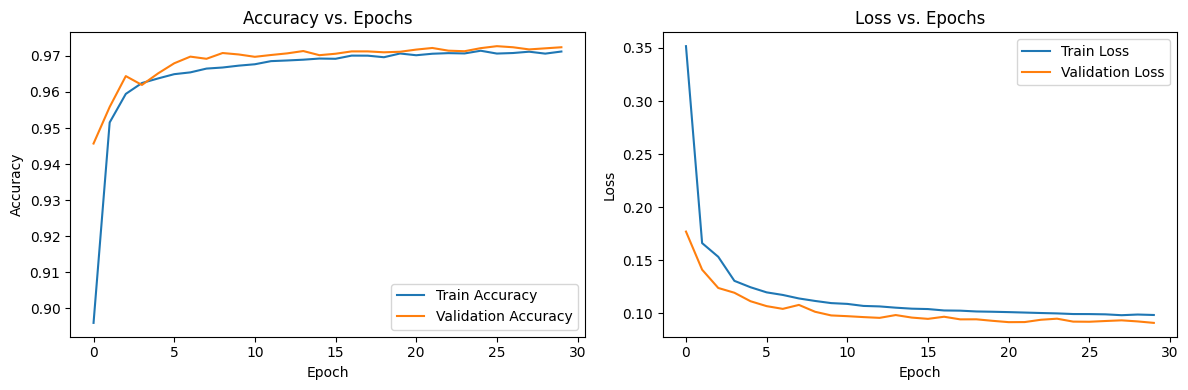

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv('stellar_dataset_label_encoded.csv')

# 2. Split into features and target
X = df.drop('class', axis=1).values
y = df['class'].values

# 3. Split into train, validation, and test sets (60% train, 20% val, 20% test)
# First split: 80% temp (train+val), 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Second split: 75% train, 25% val (of temp, so 60% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

# 4. Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# 5. One-hot encode the targets
y_train_cat = to_categorical(y_train, num_classes=3)
y_val_cat = to_categorical(y_val, num_classes=3)
y_test_cat = to_categorical(y_test, num_classes=3)

# 6. Build the ANN model with 2 hidden layers of 16 neurons each
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Train the model with validation set
history = model.fit(
    X_train, y_train_cat,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    verbose=1
)

# 8. Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

# 9. Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


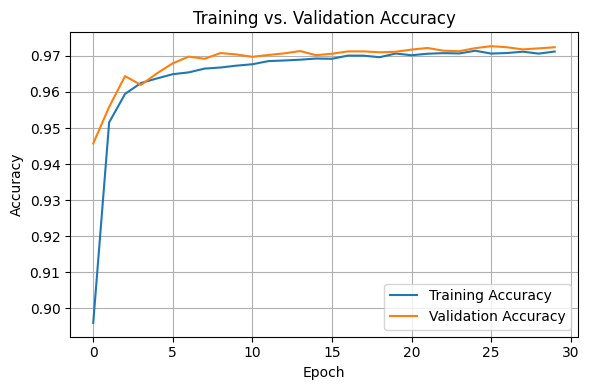

In [2]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
